In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data =pd.read_csv('../artifacts/sentiment_analysis.csv')

In [12]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [13]:
# data preprossesing
data.shape

(7920, 3)

In [14]:
data.duplicated().sum()

np.int64(0)

In [15]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [16]:
# Text Preprossesing
import re
import string

In [ ]:
convert uppercase to lowercase

In [17]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [18]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


### Remove Links

In [19]:
data["tweet"] = data["tweet"].apply(
    lambda x: " ".join(
        re.sub(r'http\S+|www\.\S+', '', x,flags=re.MULTILINE).lower()
        for x in x.split()
    )
)

In [20]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #pregnancy test #android #apps #...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


### Remove Punctuations

In [21]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
     text = text.replace(punctuation, '')
    return text
data["tweet"] = data["tweet"].apply(remove_punctuation)

In [22]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beaut...
1,2,0,finally a transparant silicon case thanks to ...
2,3,0,we love this would you go talk makememories un...
3,4,0,im wired i know im george i was made that way ...
4,5,1,what amazing service apple wont even talk to m...


 ### Remove Numbers

In [23]:
data.tail(10)

,id,label,tweet
7910,7911,0,perfect match instagood applewatch red instagr...
7911,7912,0,i am completely in love with the new iphone em...
7912,7913,0,tune in turn on drop out gtd in one app mobi...
7913,7914,1,ok so my galaxy crashed after one day now i ha...
7914,7915,0,gain followers rt this must follow me i follow...
7915,7916,0,live out loud lol liveoutloud selfie smile son...
7916,7917,0,we would like to wish you an amazing day make ...
7917,7918,0,helping my lovely 90 year old neighbor with he...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


In [24]:
data["tweet"] = data["tweet"].str.replace(r'\d+', '', regex=True)

In [25]:
data.tail(10)

,id,label,tweet
7910,7911,0,perfect match instagood applewatch red instagr...
7911,7912,0,i am completely in love with the new iphone em...
7912,7913,0,tune in turn on drop out gtd in one app mobi...
7913,7914,1,ok so my galaxy crashed after one day now i ha...
7914,7915,0,gain followers rt this must follow me i follow...
7915,7916,0,live out loud lol liveoutloud selfie smile son...
7916,7917,0,we would like to wish you an amazing day make ...
7917,7918,0,helping my lovely year old neighbor with her ...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


### Remove Stockwords

In [26]:
!pip install nltk

In [27]:
import nltk

In [28]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
with open('../static/model/corpora/stopwords/english','r') as file :
      sw = file.read().splitlines()

In [30]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [31]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [32]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,im wired know im george made way iphone cute d...
4,5,1,amazing service apple wont even talk question ...


 ### Stemming

In [33]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [34]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(word) for word in x.split()))

In [35]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...


In [36]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Building Vocabulary

In [37]:
from collections import Counter
vocab = Counter()

In [39]:
vocab

Counter()

In [40]:
for sentence in data['tweet']:
    vocab.update(sentence.split())


In [41]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 756,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 456,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 383,
         'io': 383,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 283,
         'got': 280,
         'fun': 277,
         'news': 265,
         'music': 264,
         'thank': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [42]:
len(vocab)

15901

In [43]:
data.shape

(7920, 3)

In [44]:
tokens=[key for key in  vocab if vocab[key] > 10]

In [45]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [46]:
len(tokens)

1146

In [47]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w' , encoding="utf-8")
    file.write(data)
    file.close()
save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Divide dataset in to Trainng Dataset and Test Dataset

In [48]:
x = data['tweet']
y=data['label']

In [49]:
!pip install scikit-learn

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [51]:
x_train.shape

(6336,)

In [52]:
y_test.shape

(1584,)

In [53]:
x_train

4915    new phone samsung galaxi desi islamabad lahor ...
6632    princess rose pretti barbi doll princess sexi ...
6449    arriv design perfum varvato dior cheri prada i...
182              audi offer appl android smartphon integr
3597    fact phone week old charger headphon alreadi s...
                              ...                        
5977         present disney rapunzel iphon thank mom cute
631     shesofficial followsunday followback rt teamfo...
2234    repost valaerya via crowdfir musetto bello bes...
3803    new phone motorola motox ittalkstom sogood ins...
2469    happi holiday famili holiday vacat visitindone...
Name: tweet, Length: 6336, dtype: object

In [54]:
x_test

7440    cute boy girl van newbal nice cute convers iph...
3615    istanbul q thi turkish turkiy ilov iphon insta...
5756    iphon troll appl tech innov lol fun enjoy smil...
1137    day christma samsung live laugh life instamood...
645     anoth custom thank maratavis speedi deliveri s...
                              ...                        
349     highlight week neue smartphon … smartphon huaw...
565     shatterproof im go punch someon face pieceof a...
6467    aint know ganjagoddess weed iphon case teamlig...
4357    cool girl ff foodporn dj tokyo appl app gameof...
5994    love rt wasmohuerta fck need u instagram iphon...
Name: tweet, Length: 1584, dtype: object

### Vectorization

In [55]:
def vectorizer(ds, vocabulary):
    vectorized_list = []
    
    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))  # initialize vector
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1
        
        vectorized_list.append(sentence_list)

    vectorized_list_new = np.asarray(vectorized_list, dtype=np.float32)
    return vectorized_list_new

In [56]:
vectorized_x_train=vectorizer(x_train,tokens)

In [57]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1146), dtype=float32)

In [58]:
vectorized_x_test=vectorizer(x_test,tokens)

In [59]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1146), dtype=float32)

In [60]:
y_train.value_counts()

label
0    4707
1    1629
Name: count, dtype: int64

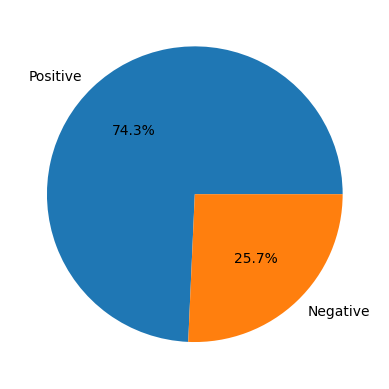

In [61]:
plt.pie(
    np.array([y_train.value_counts()[0], y_train.value_counts()[1]]),
    labels=['Positive', 'Negative'],
    autopct='%1.1f%%'
)
plt.show()


### Handle Imbalanced dataset

In [62]:
!pip install  imbalanced-learn

In [63]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

vectorized_x_train_smote, y_train_smote = smote.fit_resample(
    vectorized_x_train,
    y_train
)

print(vectorized_x_train_smote.shape, y_train_smote.shape)


(9414, 1146) (9414,)


In [64]:
y_train_smote.value_counts()

label
0    4707
1    4707
Name: count, dtype: int64

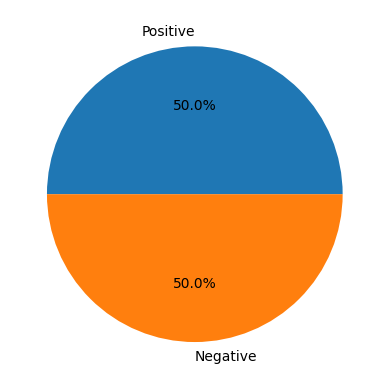

In [65]:
plt.pie(
    np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]),
    labels=['Positive', 'Negative'],
    autopct='%1.1f%%'
)
plt.show()

In [66]:
y_train_smote

0       0
1       0
2       0
3       0
4       1
       ..
9409    1
9410    1
9411    1
9412    1
9413    1
Name: label, Length: 9414, dtype: int64

In [67]:
y_test

7440    0
3615    0
5756    1
1137    0
645     0
       ..
349     0
565     1
6467    0
4357    0
5994    0
Name: label, Length: 1584, dtype: int64

In [68]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1146), dtype=float32)

### Model Training and Evaluations

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [70]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    prec = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)

    print(f"Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {prec}\n\tRecall = {rec}\n\tF1-score = {f1}")

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    prec = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)

    print(f"Validation Scores:\n\tAccuracy = {acc}\n\tPrecision = {prec}\n\tRecall = {rec}\n\tF1-score = {f1}")
                 

### Logistic Regression

In [82]:
# Train Logistic Regression
lr = LogisticRegression()

# Fit model on SMOTE-balanced training data
lr.fit(vectorized_x_train_smote, y_train_smote)

# Predict on training data
y_train_pred = lr.predict(vectorized_x_train_smote)

# Show training scores
training_scores(y_train_smote, y_train_pred)

# Predict on test data
y_test_pred = lr.predict(vectorized_x_test)

# Show validation scores
validation_scores(y_test, y_test_pred)


Training Scores:
	Accuracy = 0.94
	Precision = 0.913
	Recall = 0.973
	F1-score = 0.942
Validation Scores:
	Accuracy = 0.886
	Precision = 0.734
	Recall = 0.856
	F1-score = 0.791


### Multinomial Naive Bayers

In [83]:
# Train Naive Bayers
mnb = MultinomialNB()

# Fit model on SMOTE-balanced training data
mnb.fit(vectorized_x_train_smote, y_train_smote)

# Predict on training data
y_train_pred = mnb.predict(vectorized_x_train_smote)

# Show training scores
training_scores(y_train_smote, y_train_pred)

# Predict on test data
y_test_pred = mnb.predict(vectorized_x_test)

# Show validation scores
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.906
	Precision = 0.867
	Recall = 0.96
	F1-score = 0.911
Validation Scores:
	Accuracy = 0.883
	Precision = 0.701
	Recall = 0.927
	F1-score = 0.798


### Decision Tree

In [84]:
# Train Decision tree
dt = DecisionTreeClassifier()

# Fit model on SMOTE-balanced training data
dt.fit(vectorized_x_train_smote, y_train_smote)

# Predict on training data
y_train_pred = dt.predict(vectorized_x_train_smote)

# Show training scores
training_scores(y_train_smote, y_train_pred)

# Predict on test data
y_test_pred = dt.predict(vectorized_x_test)

# Show validation scores
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-score = 1.0
Validation Scores:
	Accuracy = 0.834
	Precision = 0.661
	Recall = 0.693
	F1-score = 0.677


### Random Forest

In [85]:
# Train Random Forest
rf = RandomForestClassifier()

# Fit model on SMOTE-balanced training data
rf.fit(vectorized_x_train_smote, y_train_smote)

# Predict on training data
y_train_pred = rf.predict(vectorized_x_train_smote)

# Show training scores
training_scores(y_train_smote, y_train_pred)

# Predict on test data
y_test_pred = rf.predict(vectorized_x_test)

# Show validation scores
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-score = 1.0
Validation Scores:
	Accuracy = 0.884
	Precision = 0.789
	Recall = 0.733
	F1-score = 0.76


### Support Vectort Machine

In [86]:
# Train Random Forest
svm = SVC()

# Fit model on SMOTE-balanced training data
svm.fit(vectorized_x_train_smote, y_train_smote)

# Predict on training data
y_train_pred = svm.predict(vectorized_x_train_smote)

# Show training scores
training_scores(y_train_smote, y_train_pred)

# Predict on test data
y_test_pred = svm.predict(vectorized_x_test)

# Show validation scores
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.979
	Precision = 0.963
	Recall = 0.995
	F1-score = 0.979
Validation Scores:
	Accuracy = 0.884
	Precision = 0.752
	Recall = 0.801
	F1-score = 0.776


In [87]:
import pickle
with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr,file)